In [36]:
import numpy as np
from glob import glob
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import json
def get(fp):
    js = dict()
    with open(fp + "predictions.json", 'r') as f:
        js['data'] = json.load(f)
    
    js['img_path'] = fp + "img.jpg"
    return js


In [37]:
preds = glob("./qualitative/*/")
pred_pth = 

In [145]:
with open("./../motifs_cc/data/stanford_filtered/VG-SGG-dicts.json", 'r') as f:
    translator = json.load(f)
    translator['idx_to_label']['0'] = "__background__"
    translator['idx_to_predicate']['0'] = "__background__"

    


In [155]:
def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
def print_list(name, input_list, scores=None, max_limit=10):
    for i, item in enumerate(input_list):
        if i > max_limit:
            return
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))


def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None, max_lim=5):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + str(box_labels[i])
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores, max_lim)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores, max_lim)
    
    return None




def viz(i, max_lim=5):
    pred = get(preds[i])
    idx2lab = lambda c: translator['idx_to_label'][str(c)]
    idx2rel = lambda tup: (translator['idx_to_predicate'][str(tup[0])], translator['idx_to_predicate'][str(tup[1])])
    
    draw_image(pred['img_path'], pred['data']['pred_boxes'], list(map(idx2lab, pred['data']['pred_classes'])), 
              list(map(idx2rel, pred['data']['pred_rel_inds'])), pred['data']['obj_scores'], pred['data']['rel_scores'], max_lim)

    
    


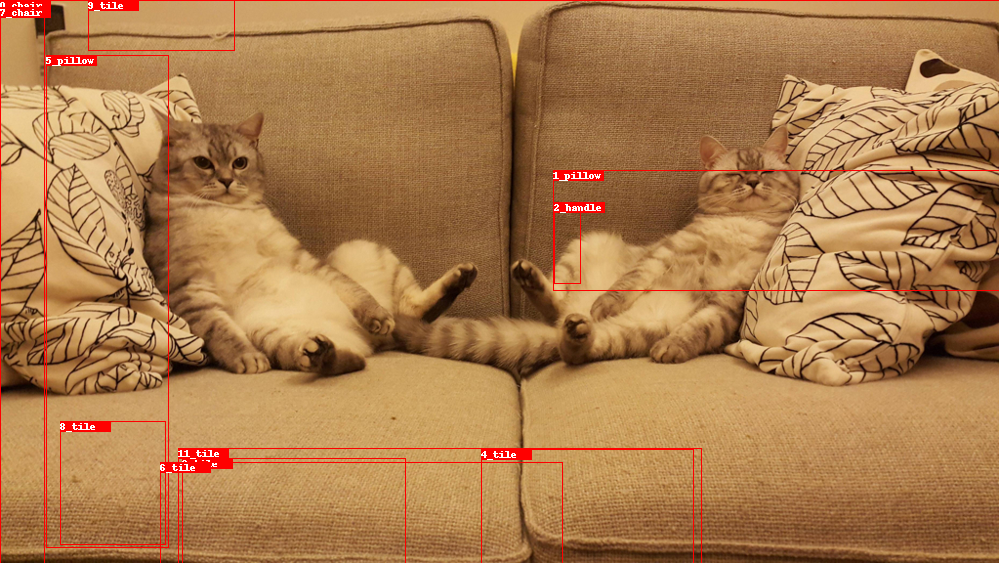

**************************************************
box_labels 0: chair; score: 0.670600414276123
box_labels 1: pillow; score: 0.5021665096282959
box_labels 2: handle; score: 0.12923254072666168
box_labels 3: tile; score: 0.354372501373291
box_labels 4: tile; score: 0.10332603752613068
box_labels 5: pillow; score: 0.9618147611618042
box_labels 6: tile; score: 0.2443649172782898
box_labels 7: chair; score: 0.13341648876667023
box_labels 8: tile; score: 0.2876672148704529
box_labels 9: tile; score: 0.9261060953140259
box_labels 10: people; score: 0.06723625212907791
**************************************************
rel_labels 0: ('and', '__background__'); score: [0.23093411326408386, 0.04431428760290146, 0.0029843912925571203, 0.006935837212949991, 0.004134184215217829, 0.002126166597008705, 0.005403369199484587, 0.00391050148755312, 0.01745440997183323, 0.013394259847700596, 0.005993866361677647, 0.008006629534065723, 0.004407164640724659, 0.0037922339979559183, 0.003959737718105316, 0.

In [167]:
viz(56, 10)